# Очистка данных. Практическая работа

## Цель практической работы

- Научиться выполнять очистку и подготовку данных для их дальнейшего использования в задаче машинного обучения.

## Что нужно сделать

- Загрузить данные в ноутбук.
- Провести разведочный анализ данных.
- Разделить данные на обучающую и тестовую выборки.
- Выполнить очистку и подготовку данных.

## Что оценивается 

1. Выполнены все этапы задания.
1. Не допущены утечки данных.

## Формат сдачи

Выполните предложенные задания: впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

## Задача
Имеется набор данных покупателей супермаркета. Проведите анализ и очистку этих данных.

### Описание данных

Дан файл Mall_Customers.csv, содержащий следующие данные по покупателям сети супермаркетов:
- CustomerID — идентификатор покупателя.
- Genre – пол покупателя.
- Age – возраст покупателя.
- Annual Income (k\$) – годовой доход покупателя, тысяч $.
- Spending Score (1–100) – рейтинг покупателя, целевая переменная.

### Задание 1

Загрузите данные из файла `Mall_Customers.csv` в ноутбук и выведите первые пять строк на экран.

In [1]:
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from ydata_profiling import ProfileReport

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Mall_Customers.csv")
print(df.shape)
df = df.rename(
    columns={
        "Genre": "sex",
        "Age": "age",
        "Annual Income (k$)": "income",
        "Spending Score (1-100)": "target",
        "CustomerID": "id",
    }
)
df.head()

(200, 5)


,id,sex,age,income,target
0,1,Male,19.0,15.0,39
1,2,Male,NaN,NaN,81
2,3,Female,NaN,16.0,6
3,4,Female,23.0,16.0,77
4,5,Female,31.0,17.0,40


### Видим, что пол у нас — величина дискретная, а возраст, доход и балл являются непрерывными.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      200 non-null    int64  
 1   sex     181 non-null    object 
 2   age     180 non-null    float64
 3   income  180 non-null    float64
 4   target  200 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [4]:
df.nunique()

id        200
sex         3
age        51
income     64
target     84
dtype: int64

### Задание 2

Проведите разведочный анализ загруженных данных. Обязательные атрибуты для анализа:
- количество пропусков в каждом признаке;
- распределения признаков;
- возможные выбросы или аномалии.

Анализ дополнительных атрибутов и свойств данных приветствуется. Используйте средства визуализации там, где это необходимо.

По результатам анализа сделайте выводы о свойствах отдельных признаков и качестве данных в целом.

In [5]:
df.isna().sum()

id         0
sex       19
age       20
income    20
target     0
dtype: int64

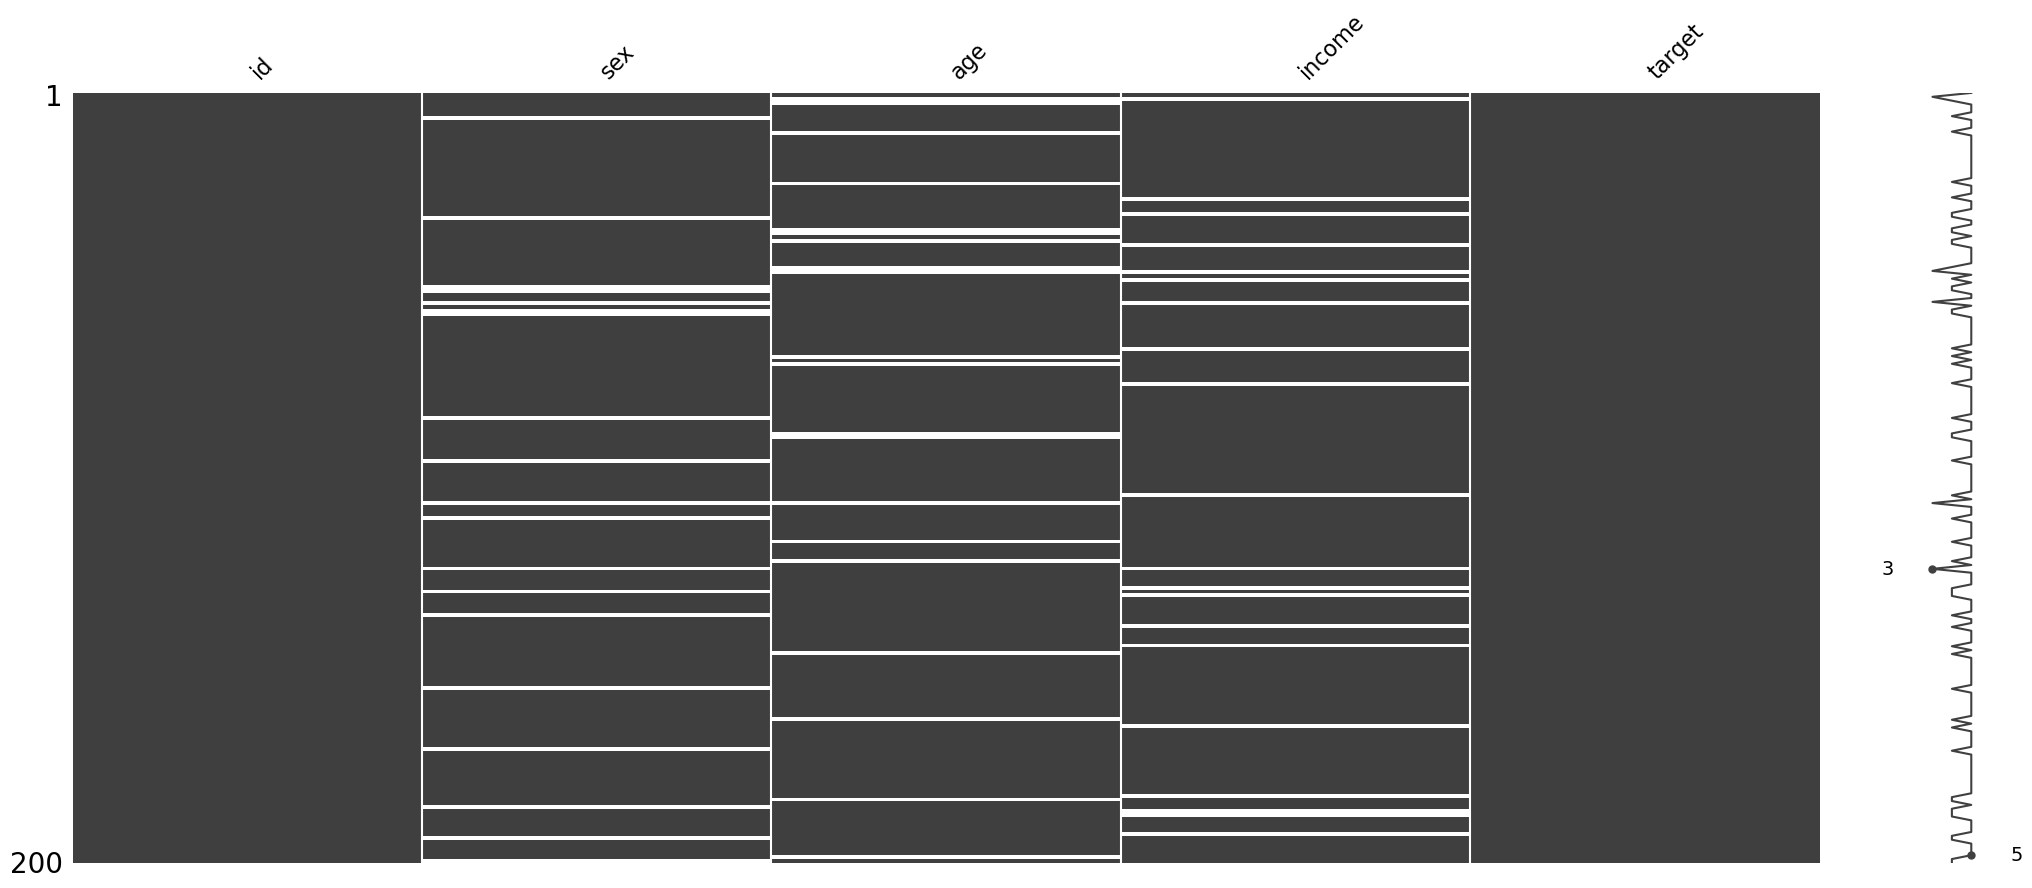

In [6]:
msno.matrix(df);

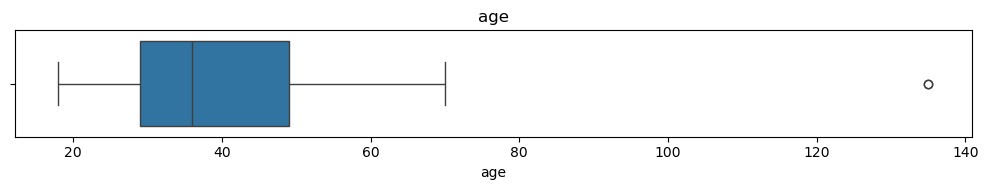

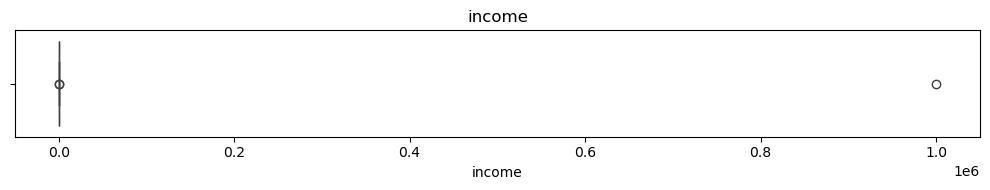

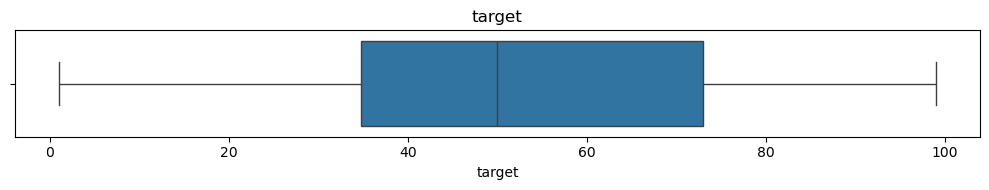

In [7]:
features = ["age", "income", "target"]
for feat in features:
    plt.figure(figsize=(10, 2))  # Уменьшаем размер графика
    sns.boxplot(data=df[feat], orient="h")  # Горизонтальная ориентация
    plt.title(feat)
    plt.tight_layout()
    plt.show();

### Резанём выброс в возрасте и аномалию в доходе, т.к. из-за них на следующих графиках не видно ни черта:

In [8]:
# не, не будем. На них отлично видны выбросы.
# df = df[~((df['age'] > 100) | (df['income'] > 200))]

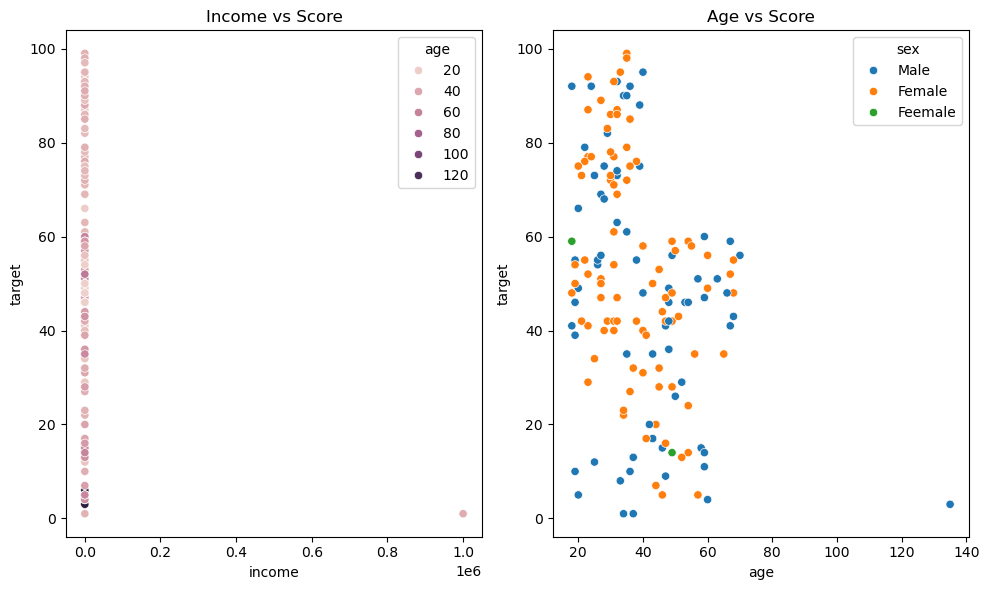

In [9]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="income", y="target", hue="age").set_title("Income vs Score")
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="age", y="target", hue="sex").set_title("Age vs Score")
plt.tight_layout()
plt.show();

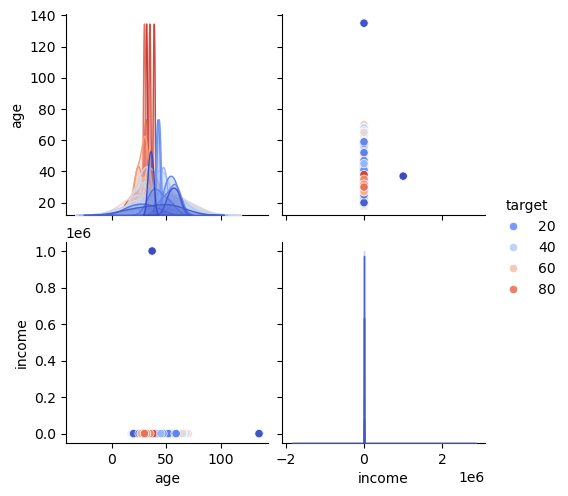

In [10]:
sns.pairplot(df.drop(columns="id"), hue="target", palette="coolwarm");

### До сих пор не могу понять, почему аннотации (числовые значения корреляции) у меня отображаются только в верхней строке карты. Можете подсказать, как забороть?


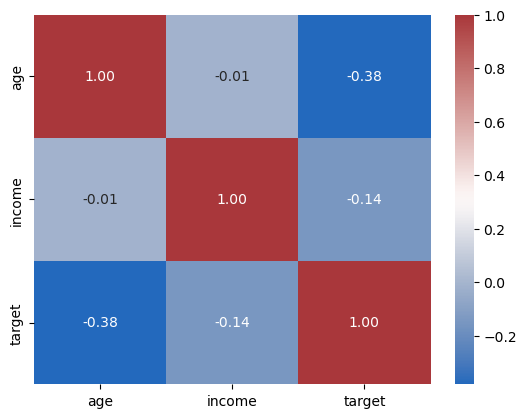

In [11]:
sns.heatmap(
    df.drop(columns=["id", "sex"]).corr(),
    cmap="vlag",
    annot=True,
    fmt=".2f",
    # annot_kws={"size": 10},
);

### Выводы по этой части:

- В возрасте был выброс и аномалия в доходе, которые мешали нам любоваться красивыми графиками, поэтому мы их беспощадно подрезали.
- В наших признаках примерно по 10% пропусков в каждом.
- Наибольший скор у граждан моложе 30 лет.
- В признаке пола есть очепятка, надо будет их вообще закодировать в единицы и нули.
- Увидели достаточно заметную отрицательную корреляцию между таргетом и возрастом посетителей (-0.38).
- **[Надрывая глотку, орёт в микрофон]** А в остальном, прекрасная маркиза, всё хорошо, всё хорошо...

#### Ну, и напоследок сделаем всё то же самое, но через ProfileReport. 

In [12]:
# profile = ProfileReport(df, title="Mall Scores Report", explorative=True)
# profile.to_notebook_iframe()

#### Видим, что достаточно запустить профильный отчёт и мы без лишних манипуляций получим всю ту же информацию.

### Задание 3

Разделите данные на обучающую и тестовую выборки в пропорции 80:20. Здесь и далее используйте random_state = 1.

In [13]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["id", "target"])
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=137
)

### Задание 7

Закодируйте категориальные признаки в обучающей выборке. Аргументируйте выбор способа кодирования.

Вначале закодирую категорию, чтобы потом проверить точность метода заполнения. Аргументировать в данном случае как-то неловко. По-моему, самый простой способ закодировать так, чтобы и разделить на 1 и 0, и избавиться от очепятки, и пропуски сохранить.

In [14]:
X_train.sex = X_train["sex"].apply(
    lambda x: np.nan if x is np.nan else (0 if x.startswith("F") else 1)
)
X_test.sex = X_test["sex"].apply(
    lambda x: np.nan if x is np.nan else (0 if x.startswith("F") else 1)
)

In [15]:
X_train.nunique()

sex        2
age       49
income    62
dtype: int64

И да, я помню про get_dummies, OHE, LabelEncoding, OrdinalEncoding. But not today.

### Задание 4

Заполните пропуски в признаках в обучающей выборке с использованием инструментов sklearn. Для каждого признака выберите и аргументируйте стратегию заполнения пропусков.

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

imputers = [
    IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=137),
    SimpleImputer(),
    KNNImputer(n_neighbors=5),
]

models = [
    ExtraTreesRegressor(random_state=137),
    XGBRegressor(random_state=137),
    CatBoostRegressor(logging_level="Silent", random_state=137),
]

score_dict = {}
for imp in imputers:
    X_train_imputed = pd.DataFrame(imp.fit_transform(X_train))
    X_test_imputed = pd.DataFrame(imp.transform(X_test))

    for model in models:
        model.fit(X_train_imputed, y_train)
        y_pred = model.predict(X_test_imputed)
        mae = mean_absolute_error(y_test, y_pred)
        score_dict[mae] = (type(model).__name__, type(imp).__name__)
        print(
            f"MAE for {type(model).__name__} with {type(imp).__name__}: {mae:.2f}"
        )

best_comb = min(score_dict.items())

print(
    f"\n\nBest model: {best_comb[1][0]} with {best_comb[1][1]}"
    f" has shown {best_comb[0]:.2f} MAE score."
)

MAE for ExtraTreesRegressor with IterativeImputer: 21.59
MAE for XGBRegressor with IterativeImputer: 21.11
MAE for CatBoostRegressor with IterativeImputer: 19.81
MAE for ExtraTreesRegressor with SimpleImputer: 21.62
MAE for XGBRegressor with SimpleImputer: 21.96
MAE for CatBoostRegressor with SimpleImputer: 19.49
MAE for ExtraTreesRegressor with KNNImputer: 19.86
MAE for XGBRegressor with KNNImputer: 19.72
MAE for CatBoostRegressor with KNNImputer: 18.09


Best model: CatBoostRegressor with KNNImputer has shown 18.09 MAE score.


#### Видим, что лучшим импьютером является kNN, поэтому будем пользоваться им впредь.

In [17]:
X_train_imputed = pd.DataFrame(
    KNNImputer(n_neighbors=5).fit_transform(X_train), columns=X_train.columns
)
X_test_imputed = pd.DataFrame(
    KNNImputer(n_neighbors=5).fit_transform(X_test), columns=X_train.columns
)

X_train_imputed.head()

,sex,age,income
0,0.6,30.0,137.0
1,0.0,31.6,39.0
2,1.0,53.0,46.0
3,1.0,49.0,42.0
4,1.0,47.0,78.0


Видим, что в результате ранней числовой категоризации пола возникла небольшая беда: в признаке при замене пропусков появились значения типа 0.6. Заборем данную проблему:

In [18]:
X_train_imputed.sex = X_train_imputed.sex.apply(lambda x: 1 if x >= 0.5 else 0)
X_test_imputed.sex = X_test_imputed.sex.apply(lambda x: 1 if x >= 0.5 else 0)
X_train_imputed.head()

,sex,age,income
0,1,30.0,137.0
1,0,31.6,39.0
2,1,53.0,46.0
3,1,49.0,42.0
4,1,47.0,78.0


### Задание 5

Найдите выбросы в признаках обучающей выборки. Замените выбросы, если таковые имеются, и аргументируйте выбор метода поиска выбросов.


#### Метод явных порогов.

Мы уже много раз видели выбросы всеми средствами (глаза + boxplot, pairplot, ProfileReport), поэтому идентифицировать их легко. В возрасте укажем медианный, в доходе — максимальный по выборке.

In [19]:
X_train_thresh = X_train_imputed.copy()
X_train_thresh.loc[X_train_thresh["age"] > 100, "age"] = X_train_thresh[
    "age"
].median()
X_train_thresh.loc[X_train_thresh["income"] > 200, "income"] = X_train_thresh[
    "income"
].max()

X_test_thresh = X_test_imputed.copy()
X_test_thresh.loc[X_test_thresh["age"] > 100, "age"] = X_test_thresh["age"].median()
X_test_thresh.loc[X_test_thresh["income"] > 200, "income"] = X_test_thresh[
    "income"
].max()


In [20]:
def get_mae(X_train, y_train, X_test, y_test):
    cb = CatBoostRegressor(logging_level="Silent", random_state=137)
    cb.fit(X_train, y_train)
    y_pred = cb.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE score for {type(cb).__name__} with {type(imp).__name__}: {mae:.2f}")

get_mae(X_train_thresh, y_train, X_test_thresh, y_test)

MAE score for CatBoostRegressor with KNNImputer: 16.41


#### Метод z-score

In [21]:
from scipy.stats import zscore


X_train_z_score = X_train_imputed.copy()
X_train_z_score[["age", "income"]] = zscore(X_train_z_score[["age", "income"]])

X_test_z_score = X_test_imputed.copy()
X_test_z_score[["age", "income"]] = zscore(X_test_z_score[["age", "income"]])

get_mae(X_train_z_score, y_train, X_test_z_score, y_test)

MAE score for CatBoostRegressor with KNNImputer: 25.29


#### Метод Local Outlier Factor

In [22]:
from sklearn.neighbors import LocalOutlierFactor

df_train_lof = pd.concat(
    [X_train_imputed.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1
)
df_test_lof = pd.concat(
    [X_test_imputed.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1
)

lof = LocalOutlierFactor(n_neighbors=20)
outliers_train = lof.fit_predict(df_train_lof[["age", "income"]])
outliers_test = lof.fit_predict(df_test_lof[["age", "income"]])

df_train_lof = df_train_lof[outliers_train == 1]
df_test_lof = df_test_lof[outliers_test == 1]


X_train_lof = df_train_lof[["sex", "age", "income"]]
y_train_lof = df_train_lof[["target"]]
X_test_lof = df_test_lof[["sex", "age", "income"]]
y_test_lof = df_test_lof[["target"]]
get_mae(X_train_lof, y_train_lof, X_test_lof, y_test_lof)

MAE score for CatBoostRegressor with KNNImputer: 17.37


#### Метод PCA

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_imputed[["age", "income"]])
X_test_pca = pca.transform(X_test_imputed[["age", "income"]])

get_mae(X_train_pca, y_train, X_test_pca, y_test)

MAE score for CatBoostRegressor with KNNImputer: 17.85


### Задание 6

Нормализуйте численные признаки. Аргументируйте выбор стратегии нормализации для каждого признака.


In [24]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR

models = [
    LogisticRegression(max_iter=1000, random_state=137),
    LinearRegression(),
    SVR(kernel="poly", degree=5, coef0=1, C=1),
    ExtraTreesRegressor(random_state=137),
    XGBRegressor(random_state=137),
    CatBoostRegressor(logging_level="Silent", random_state=137),
    # SVR(kernel="rbf", C=1),
    # SVR(kernel="linear", C=1),
    # CatBoostRegressor(logging_level="Silent", random_state=137),
]

scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]

score_dict = {}
for scaler in scalers:
    X_train_income_scaled = pd.DataFrame(
        scaler.fit_transform(X_train_imputed[["income", "age"]]),
        columns=["income", "age"],
    )
    X_test_income_scaled = pd.DataFrame(
        scaler.transform(X_test_imputed[["income", "age"]]),
        columns=["income", "age"],
    )
    X_train_scaled = pd.concat(
        [X_train_imputed.drop(columns=["age", "income"]), X_train_income_scaled], axis=1
    )
    X_test_scaled = pd.concat(
        [X_test_imputed.drop(columns=["age", "income"]), X_test_income_scaled], axis=1
    )
    for model in models:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mae = mean_absolute_error(y_test, y_pred)
        print(
            f"MAE for {type(model).__name__} with {type(scaler).__name__}: {mae:.2f}"
        )
        score_dict[mae] = (type(model).__name__, type(scaler).__name__)

best_comb = min(score_dict.items())

print(
    f"\n\nBest model: {best_comb[1][0]} with {best_comb[1][1]}"
    f" has shown {best_comb[0]:.2f} MAE score."
)

MAE for LogisticRegression with StandardScaler: 22.88
MAE for LinearRegression with StandardScaler: 22.10
MAE for SVR with StandardScaler: 21.96
MAE for ExtraTreesRegressor with StandardScaler: 19.48
MAE for XGBRegressor with StandardScaler: 19.29
MAE for CatBoostRegressor with StandardScaler: 17.23
MAE for LogisticRegression with MinMaxScaler: 19.10
MAE for LinearRegression with MinMaxScaler: 22.10
MAE for SVR with MinMaxScaler: 20.85
MAE for ExtraTreesRegressor with MinMaxScaler: 19.48
MAE for XGBRegressor with MinMaxScaler: 19.29
MAE for CatBoostRegressor with MinMaxScaler: 17.23
MAE for LogisticRegression with RobustScaler: 24.60
MAE for LinearRegression with RobustScaler: 22.10
MAE for SVR with RobustScaler: 18.67
MAE for ExtraTreesRegressor with RobustScaler: 19.48
MAE for XGBRegressor with RobustScaler: 19.29
MAE for CatBoostRegressor with RobustScaler: 17.25


Best model: CatBoostRegressor with MinMaxScaler has shown 17.23 MAE score.


#### Как видно, нормализация в нашем случае не привела к улучшению показателя MAE при нормализации. Ни в одном из случаев. Я даже пробовал нормализовать только доход, но там показатели были не лучше.

### Задание 8
Проведите очистку и подготовку тестовых данных. Используйте препроцессоры и другие инструменты, которые вы уже использовали при подготовке обучающей выборки, без их дополнительной настройки.

#### Да я уже по ходу работы это проделал.

## Выводы.

#### Вывод №1.
Чтобы сократить время, на этапе EDA достаточно создать ProfileReport из YdataProfiling, т.к. он содержит всю необходимую информацию, пусть и не так красиво оформленную, как если бы мы сами всё создавали своими шаловливыми ручонками. Ну, может, боксплоты надо отрисовывать — уж очень они информативно показывают выбросы.

#### Вывод №2.
Настало время поговорить про главное... Про обрезание. 

- Учитывая, что выбросы в данном датасете на графиках не заметил бы только слепой, то самым лучшим способом оказалось их либо полностью вырезать из дф, либо преобразовать в зависимости от признака. 
- Прекрасно себя показал метод локальной факторизации выбросов, поскольку выбросы валялись далеко в сторонке от нормальных значений и плакали, потому что  с ними никто не хотел дружить. Метод, стоит отметить, в данном случае оказался непрост в применении, поскольку у нас датасет был уже поколот на данные и таргет, и нам пришлось их склеивать и снова колоть, чтобы получить МАЕ.
- Широко освещённый на разных ресурсах метод главных компонент в данном случае показал себя хуже других методов. Интересно, почему. Видимо, потому, что данные не выявили никакой линейной зависимости. Если вспомним, scatterplot у нас получился в виде буквы Х.
- Редко упоминаемый Z-score также был не на высоте. 
- Делать обрезание по квантилям я не стал, т.к. сразу видел, что нижнюю границу по возрасту резать вообще не стоило, да и значения по верхней границе ради одного выброса — дело неблагодарное.

#### Вывод №3.
Нормализация значений также не принесла нам существенных преимуществ. Опять же — значения в выборке скомпонованы достаточно компактно, выбросов нет. Результат соответствующий. Единственной моделью, для которой нормализация пошла на пользу, естественным образом, является SVR и именно она показала себя с наилучшей стороны. 

#### Вывод №4.
Из импьютеров наилучшим оказался kNN. Вот, где классный метод для заполнения пропущенных значений! К слову, он себя наилучшим образом проявил при n_neighbors=5. Ни больше, ни меньше.

#### Вывод №5.
Я всё больше начинаю любить catboost. И машинное обучение.